## <span style="color:orange">Techniques: </span>
- Decision tree
- Random Forest tree
- Gaussian Naive Bayes
- Logistic Regression

### <span style="color:purple">Dataset: **Income Prediction** !</span>

### <span style="color:red">Problem: Classification</span>

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

In [1]:
# import Libraries !

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('income_evaluation.csv')
df.head()

,Age,Work_Class,Education,Scale,Marital-Status,Occupation,Relationship,Face,Gender,Hours-Per-Week,Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,USA,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,USA,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,USA,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,USA,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [3]:
df.shape

(541, 12)

 ### **Missing Values**

In [4]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


In [5]:
df.isnull().sum()

Age                0
 Work_Class        0
 Education         0
 Scale             0
 Marital-Status    0
 Occupation        0
 Relationship      0
Face               0
Gender             0
 Hours-Per-Week    0
 Country           0
Income             0
dtype: int64

 ### **Numerical Features** 

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 3


,Age,Scale,Hours-Per-Week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


 ### **Discrete Variable** 

In [7]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature
df[discrete_Feature].head()

The Discrete feature is : 1


,Scale
0,13
1,13
2,9
3,7
4,13


 ### **Continous Variable** 

In [8]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature ]

print("The Continous feature is :",len(continous_Feature))
continous_Feature
df[continous_Feature].head()

The Continous feature is : 2


,Age,Hours-Per-Week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40


  ### **Categorical feature** 

In [9]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature
df[categorical_feature].head()

9


,Work_Class,Education,Marital-Status,Occupation,Relationship,Face,Gender,Country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,USA,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,USA,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,USA,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,USA,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [10]:
X = df.drop('Income', axis=1)
y = df[['Income']]

In [11]:
X.head(2)

,Age,Work_Class,Education,Scale,Marital-Status,Occupation,Relationship,Face,Gender,Hours-Per-Week,Country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,USA
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,USA


In [12]:
y.head(2)

,Income
0,<=50K
1,<=50K


In [13]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
df['Income'] = df['Income'].replace(' >50K', 'High') 
df['Income'] = df['Income'].replace(' <=50K', 'Low') 

In [15]:
df['Income'].unique()

array(['Low', 'High'], dtype=object)

### <span style="color:cyan">Step: 02</span>: Data Normalize

#### Encoding

In [16]:
# encode the catagorical variables !
le = LabelEncoder()

feature = [i for i in df if i not in ['Age', 'Scale', 'Hours-Per-Week', 'Income']]
for i in feature :
    df[i]= le.fit_transform(df[i])

df.head()


,Age,Work_Class,Education,Scale,Marital-Status,Occupation,Relationship,Face,Gender,Hours-Per-Week,Country,Income
0,39,6,9,12,4,1,1,4,1,25,26,Low
1,50,5,9,12,2,4,0,4,1,8,26,Low
2,38,3,11,8,0,6,1,4,1,25,26,Low
3,53,3,1,6,2,6,0,2,1,25,26,Low
4,28,3,9,12,2,10,5,2,0,25,4,Low


#### Min-Max Scaling

In [17]:
# transformation !
from sklearn.preprocessing import MinMaxScaler

feature = X.columns
scaling = MinMaxScaler()
df[feature] = scaling.fit_transform(df[feature])
X = df[feature]
X.head(3)


,Age,Work_Class,Education,Scale,Marital-Status,Occupation,Relationship,Face,Gender,Hours-Per-Week,Country
0,0.301370,0.750,0.600000,0.800000,0.666667,0.071429,0.2,0.8,1.0,0.543478,1.0
1,0.452055,0.625,0.600000,0.800000,0.333333,0.285714,0.0,0.8,1.0,0.173913,1.0
2,0.287671,0.375,0.733333,0.533333,0.000000,0.428571,0.2,0.8,1.0,0.543478,1.0


### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

In [18]:
df.isnull().sum()

Age                0
 Work_Class        0
 Education         0
 Scale             0
 Marital-Status    0
 Occupation        0
 Relationship      0
Face               0
Gender             0
 Hours-Per-Week    0
 Country           0
Income             0
dtype: int64

In [19]:
print("Before Cleaning:", df.shape)

Before Cleaning: (541, 12)


***

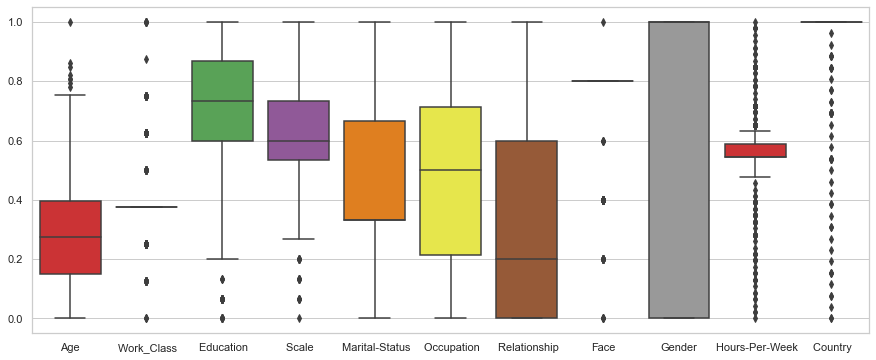

In [20]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            palette="Set1")
plt.show()            

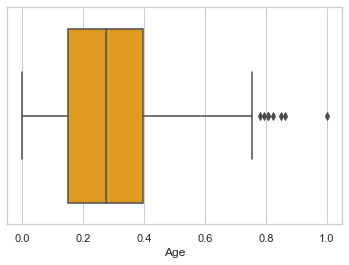

In [21]:
# Age

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="Age",
            color="orange")
plt.show()            

In [22]:
df = df[df['Age']<0.73]

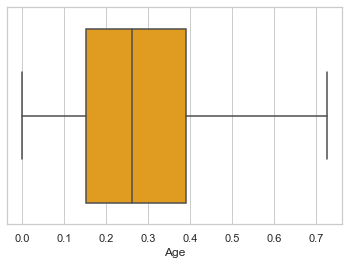

In [23]:
# Age

sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="Age",
            color="orange")
plt.show()            

In [24]:
print("After Cleaning:", df.shape)

After Cleaning: (531, 12)


***

 ## **Model Building**

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

***

### <span style="color:cyan">Step: 05</span>: Techniques !

## Decision tree !

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model


DecisionTreeClassifier()

### Evaluate or Test Model Accuracy

In [27]:
predicted_values = dt_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

dt_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Decision tree:",dt_score)


Decision tree: 72.48


***

***

## Random Forest tree !

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model


C:\Users\fahad\AppData\Local\Temp/ipykernel_12596/4111477682.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

### Evaluate or Test Model Accuracy

In [29]:
predicted_values = rf_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

rf_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("Random Forest:", rf_score)


Random Forest: 79.82


***

***

## Gaussian Naive Bayes !

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model


c:\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### Evaluate or Test Model Accuracy

In [31]:
predicted_values = gnb_model.predict(X_test)
predicted_values

from sklearn.metrics import accuracy_score

import numpy as np

gnb_score = np.round(accuracy_score(y_test, predicted_values)*100, 2)
print("GaussianNB:", gnb_score)


GaussianNB: 74.31


***

***

### <span style="color:cyan">Step: 05</span>: Fit Logistic Regression !

In [32]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model


c:\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### <span style="color:cyan">Step: 06</span>: Evaluate or Test Model Accuracy

In [33]:
import numpy as np

lr_score = np.round(lr_model.score(X_test, y_test)*100, 2)
print("Logistic Regression:", lr_score)


Logistic Regression: 83.49


***

***

In [34]:
data={'Decesion Tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian Naive Bayes'     :[gnb_score],
      'Logistic Regression'      :[lr_score]
}

In [35]:
Evaluation =pd.DataFrame(data, index=['Score'])
Evaluation

,Decesion Tree,Random Forest,Gaussian Naive Bayes,Logistic Regression
Score,72.48,79.82,74.31,83.49


***

***